<img src='https://visitor-badge.glitch.me/badge?page_id=shonenkovAI-Kandinsky-12b-public' alt='visitor badge'>

**Author:** [Alex Shonenkov](https://www.kaggle.com/shonenkov)

**Telegram Channel:** https://t.me/shonenkovAI

**Discord Server:** https://discord.gg/xV7dNbT9NU 

In [1]:
!pip install ruclip==0.0.1 > /dev/null
!pip install rudalle==1.1.0 > /dev/null

In [2]:
import torch
!python --version
print('torch:', torch.__version__)
!pip freeze | grep rudalle
!pip freeze | grep ruclip
!pip freeze | grep transformers
!pip freeze | grep torchmetrics
!nvidia-smi

Python 3.7.12
torch: 1.9.1+cu111
rudalle==1.1.0
ruclip==0.0.1
taming-transformers==0.0.1
transformers==4.10.3
torchmetrics==0.5.0
Thu Jun 23 01:21:36 2022       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 450.80.02    Driver Version: 450.80.02    CUDA Version: 11.1     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  A100 Graphics D...  On   | 00000000:87:00.0 Off |                    0 |
| N/A   30C    P0    63W / 400W |      0MiB / 81252MiB |      0%      Default |
|                               |                      |             Disabled |
+-------------------------------+-----

In [3]:
import ruclip
import requests
from rudalle.pipelines import generate_images, show, cherry_pick_by_ruclip
from rudalle import get_rudalle_model, get_tokenizer, get_vae
from rudalle.utils import seed_everything
from rudalle.image_prompts import ImagePrompts
from PIL import Image, ImageDraw

## Prepare models

In [4]:
KANDINSKY_TOKEN = '<unknown>'

In [5]:
device = 'cuda'
tokenizer = get_tokenizer()
vae = get_vae(dwt=False).to(device)
vae.eval();

clip, processor = ruclip.load('ruclip-vit-large-patch14-336', device=device)
clip_predictor = ruclip.Predictor(clip, processor, device, bs=4)

dalle = get_rudalle_model('Kandinsky', fp16=False, device=device, use_auth_token=KANDINSKY_TOKEN)

Downloading:   0%|          | 0.00/224k [00:00<?, ?B/s]

tokenizer --> ready
Working with z of shape (1, 256, 32, 32) = 262144 dimensions.


Downloading:   0%|          | 0.00/346M [00:00<?, ?B/s]

vae --> ready


Downloading:   0%|          | 0.00/748k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/349 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/1.71G [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/23.0G [00:00<?, ?B/s]

Kandinsky is large 12 billion params model from the family GPT3-like, that uses Russian language and text+image multi-modality.


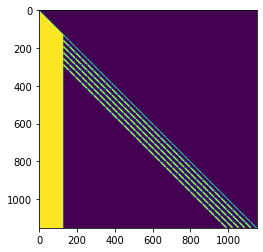

In [6]:
import matplotlib.pyplot as plt
plt.imshow(dalle.get_param('transformer').conv_mask.detach().cpu());

## Image Generation with Kandinsky

  0%|          | 0/1024 [00:00<?, ?it/s]

/home/user/conda/lib/python3.7/site-packages/torch/_tensor.py:575: UserWarning: floor_divide is deprecated, and will be removed in a future version of pytorch. It currently rounds toward 0 (like the 'trunc' function NOT 'floor'). This results in incorrect rounding for negative values.
To keep the current behavior, use torch.div(a, b, rounding_mode='trunc'), or for actual floor division, use torch.div(a, b, rounding_mode='floor'). (Triggered internally at  ../aten/src/ATen/native/BinaryOps.cpp:467.)
  return torch.floor_divide(self, other)


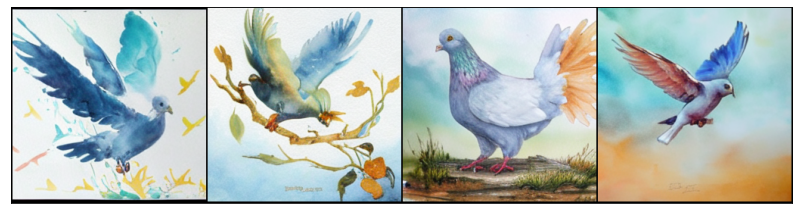

In [7]:
text = 'очень красивый голубь акварель'
seed_everything(42)
top_k, top_p = 768, 0.99
pil_images, _ = generate_images(text, tokenizer, dalle, vae, top_k=top_k, images_num=4, bs=4, top_p=top_p)
show(pil_images, 4)

  0%|          | 0/1024 [00:00<?, ?it/s]

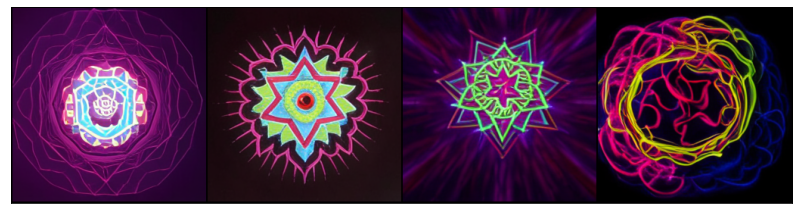

In [8]:
text = 'Киберпанк Неон Мандала искусство'
seed_everything(42)
top_k, top_p = 768, 0.99
pil_images, _ = generate_images(text, tokenizer, dalle, vae, top_k=top_k, images_num=4, bs=4, top_p=top_p)
show(pil_images, 4)

  0%|          | 0/1024 [00:00<?, ?it/s]

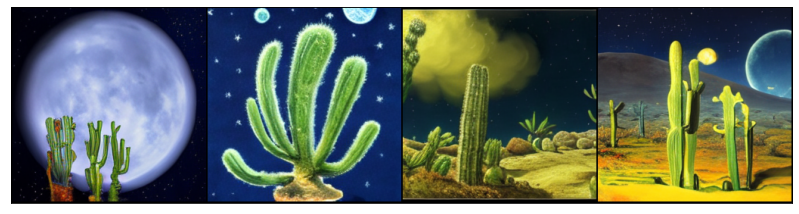

In [9]:
text = 'кактус на луне'
seed_everything(42)
top_k, top_p = 768, 0.99
pil_images, _ = generate_images(text, tokenizer, dalle, vae, top_k=top_k, images_num=4, bs=4, top_p=top_p)
show(pil_images, 4)

## Image Prompt with Kandinsky

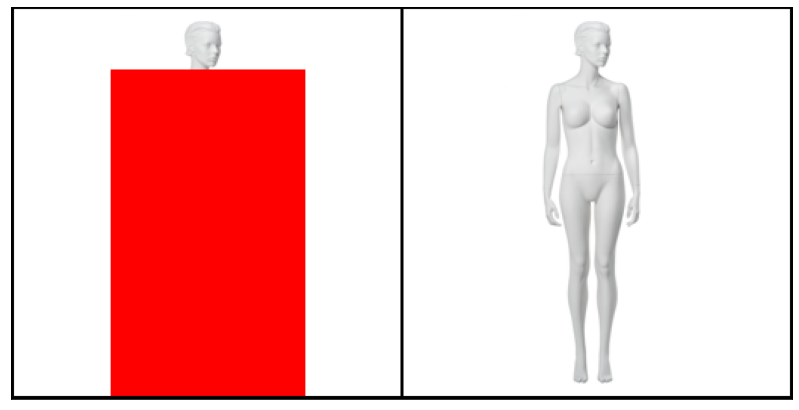

In [10]:
url = 'https://manekens.ru/storage/app/uploads/public/34/5d25eabf21090114407732.jpg'
pil_img = Image.open(requests.get(url, stream=True).raw).resize((256, 256))

borders = {'up': 5, 'left': 8, 'right': 8, 'down': 0}
image_prompts = ImagePrompts(pil_img, borders, vae, device, crop_first=False)

demo_img = pil_img.copy()
draw = ImageDraw.Draw(demo_img)
draw.rectangle((borders['left']*8, borders['up']*8, 256-borders['right']*8, 256 -  borders['down']*8), fill=255)
show([demo_img, pil_img])

  0%|          | 0/1024 [00:00<?, ?it/s]

  0%|          | 0/1024 [00:00<?, ?it/s]

  0%|          | 0/1024 [00:00<?, ?it/s]

  0%|          | 0/1024 [00:00<?, ?it/s]

16it [00:00, 29.04it/s]


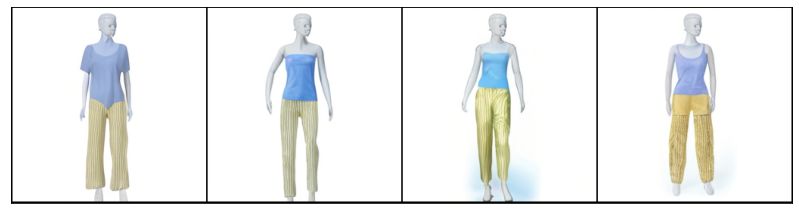

In [15]:
text = 'голубая футболка и желтые штаны на манекене'
seed_everything(42)
top_k, top_p = 768, 0.99
images_num = 16
pil_images, _ = generate_images(text, tokenizer, dalle, vae, top_k=top_k, top_p=top_p, images_num=images_num, bs=4, image_prompts=image_prompts)
top_images, clip_scores = cherry_pick_by_ruclip(pil_images, text, clip_predictor, count=4)
show(top_images, 4)

  0%|          | 0/1024 [00:00<?, ?it/s]

  0%|          | 0/1024 [00:00<?, ?it/s]

  0%|          | 0/1024 [00:00<?, ?it/s]

  0%|          | 0/1024 [00:00<?, ?it/s]

16it [00:00, 143.87it/s]


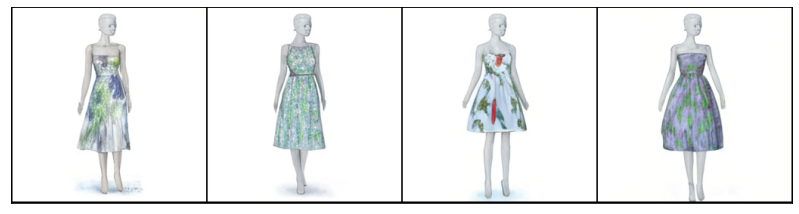

In [16]:
text = 'цветной эскиз летнего платья на манекене'
seed_everything(42)
top_k, top_p = 768, 0.99
images_num = 16
pil_images, _ = generate_images(text, tokenizer, dalle, vae, top_k=top_k, top_p=top_p, images_num=images_num, bs=4, image_prompts=image_prompts)
top_images, clip_scores = cherry_pick_by_ruclip(pil_images, text, clip_predictor, count=4)
show(top_images, 4)

## Image Generation with Auto-Cherry-Pick by ruCLIP (better quality)

  0%|          | 0/1024 [00:00<?, ?it/s]

  0%|          | 0/1024 [00:00<?, ?it/s]

  0%|          | 0/1024 [00:00<?, ?it/s]

  0%|          | 0/1024 [00:00<?, ?it/s]

  0%|          | 0/1024 [00:00<?, ?it/s]

  0%|          | 0/1024 [00:00<?, ?it/s]

  0%|          | 0/1024 [00:00<?, ?it/s]

  0%|          | 0/1024 [00:00<?, ?it/s]

  0%|          | 0/1024 [00:00<?, ?it/s]

  0%|          | 0/1024 [00:00<?, ?it/s]

  0%|          | 0/1024 [00:00<?, ?it/s]

  0%|          | 0/1024 [00:00<?, ?it/s]

  0%|          | 0/1024 [00:00<?, ?it/s]

  0%|          | 0/1024 [00:00<?, ?it/s]

  0%|          | 0/1024 [00:00<?, ?it/s]

  0%|          | 0/1024 [00:00<?, ?it/s]

64it [00:00, 123.79it/s]


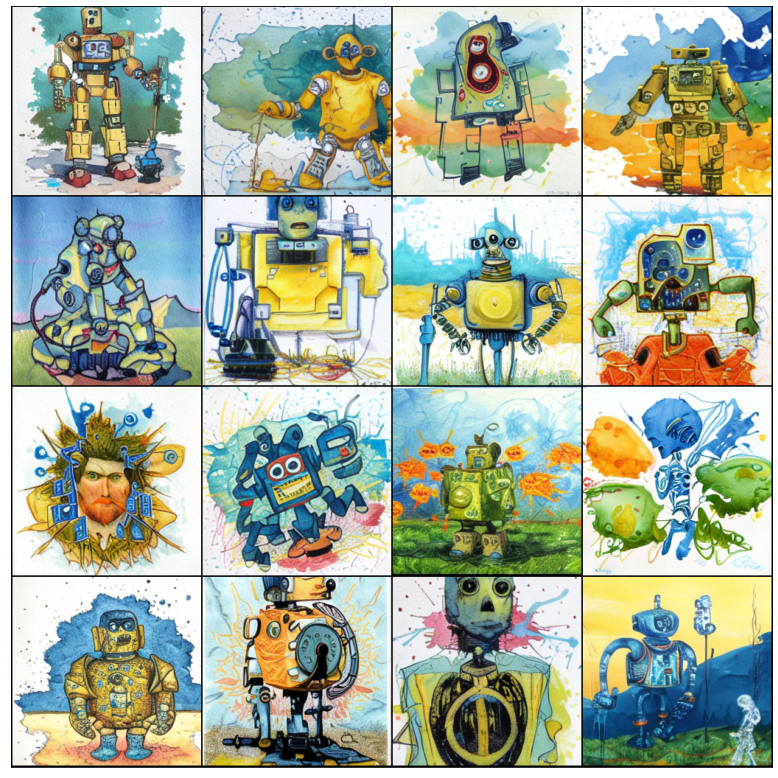

In [116]:
text = 'роботы акварелью в стиле ван гога'
seed_everything(42)
top_k, top_p = 768, 0.99
images_num = 64
pil_images, _ = generate_images(text, tokenizer, dalle, vae, top_k=top_k, top_p=top_p, images_num=images_num, bs=4)
top_images, clip_scores = cherry_pick_by_ruclip(pil_images, text, clip_predictor, count=16)
show(top_images, 4)